# Importação de Bibliotecas

In [1]:
#importando bibliotecas
import pickle
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Carga de Dados

In [2]:
#Carregando as variaveis tratadas no pré processamento
with open('../../../01-Análise Exploratória/Pré-Processamento/Census/base/census.pkl', 'rb') as f:
    x_train, x_test, y_train, y_test = pickle.load(f)

# Treina Árvore de Decisão

In [3]:
#Treinando o modelo
tree_decision = DecisionTreeClassifier(criterion='entropy', random_state= 0)
tree_decision.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [4]:
#Atributos com maior relevancia 
tree_decision.feature_importances_

array([1.15011818e-03, 4.21237943e-03, 4.70577642e-03, 0.00000000e+00,
       9.82096148e-03, 4.21726108e-03, 8.93805783e-03, 5.94385833e-03,
       9.66182408e-05, 5.52222732e-04, 7.08105139e-04, 1.10564850e-04,
       3.43159153e-04, 1.33086192e-04, 4.64721135e-04, 3.86442044e-04,
       1.50521293e-03, 2.19919157e-03, 1.74396346e-03, 6.32194974e-04,
       2.05227056e-03, 1.63687981e-03, 0.00000000e+00, 3.78847434e-04,
       3.57267357e-03, 1.85733406e-03, 5.50766319e-04, 1.93499150e-01,
       8.46621858e-04, 2.77224778e-03, 1.78397039e-03, 1.14790256e-03,
       1.88672295e-03, 5.82062871e-03, 0.00000000e+00, 1.02410533e-02,
       9.56865533e-03, 3.57766394e-03, 2.47738784e-03, 5.75620984e-03,
       4.58470918e-03, 0.00000000e+00, 8.36466675e-03, 3.34266127e-03,
       7.45141050e-03, 5.19245833e-03, 5.90550646e-03, 2.66727040e-03,
       2.23700286e-03, 4.60949473e-04, 1.61020875e-03, 1.97115020e-03,
       3.54674211e-03, 0.00000000e+00, 2.49050061e-03, 4.21156915e-03,
      

In [5]:
#Grafico da Arvore de Decisão
'''
previsores = ['idade', 'renda', 'emprestimo_mnt']

figure, axes = plt.subplots(nrows=1,ncols=1, figsize=(10,10))
tree.plot_tree(tree_decision, feature_names=previsores, class_names = ['Paga', 'Não Paga'],filled=True);
''';

In [6]:
# Previsões da x_test
previsoes = tree_decision.predict(x_test)

In [7]:
#Acurácia do modelo
accuracy_score(y_test, previsoes)

0.8088438507600184

              precision    recall  f1-score   support

       <=50K       0.87      0.87      0.87      4918
        >50K       0.61      0.61      0.61      1595

    accuracy                           0.81      6513
   macro avg       0.74      0.74      0.74      6513
weighted avg       0.81      0.81      0.81      6513



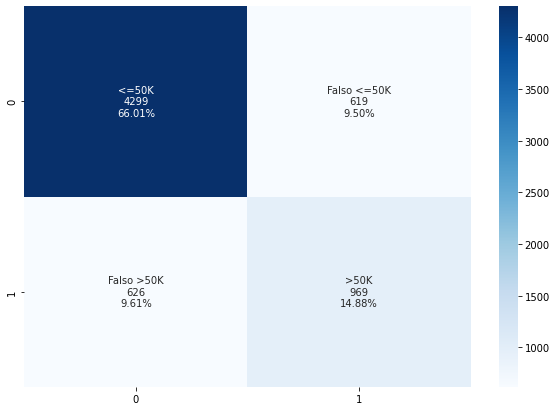

In [8]:
#Resultado da Classificação
print(classification_report(y_test, previsoes))
cf_matrix = confusion_matrix(y_test, previsoes)

plt.figure(figsize = (10,7))

group_names = ['<=50K','Falso <=50K','Falso >50K','>50K']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns_plot = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.savefig('img/confusion_matrix.png', dpi=300)